In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from data_structs import NewsDataLoader, EvaluationDataLoader, ModelEnum
from utils import model_predict, model_evaluate, model_predict_evaluate


model_names = ['knn', 'logisticRegression', 'linearSVM', 
               'randomForest', 'voting', 'stack', 'adaBoost'] # TODO: add 'rnn'

test_loaders_directory = dict()
score_packages_test_directory = {name : [] for name in model_names}

test_df_5000 = pd.read_csv(f'dataset_modeling/test_5000.csv', index_col=0)
division = int(5000 / 5)
news = test_df_5000.iloc[0 : division, :]

for index in range(1, 6):
    test_df_1000 = test_df_5000.iloc[division * index : division * (index + 1), :]
    test_df_predictors_rnn = test_df_1000['title']
    test_df_predictors = test_df_1000.drop(columns = ['title', 'label'])
    test_df_target = test_df_1000['label']
    test_df_loader = NewsDataLoader(test_df_predictors, test_df_target)
    test_df_loader_rnn = NewsDataLoader(test_df_predictors_rnn, test_df_target)
    test_loaders_directory['test' + str(index)] = (test_df_loader, test_df_loader_rnn)

from sklearn.model_selection import train_test_split
train_news, test_news = train_test_split(news, test_size=0.2)

train_news_predictors_rnn = train_news['title']
train_news_predictors = train_news.drop(columns = ['title', 'label'])
train_news_target = train_news['label']
train_news_loader = NewsDataLoader(train_news_predictors, train_news_target)
train_news_loader_rnn = NewsDataLoader(train_news_predictors_rnn, train_news_target)

test_news_predictors_rnn = test_news['title']
test_news_predictors = test_news.drop(columns = ['title', 'label'])
test_news_target = test_news['label']
test_news_loader = NewsDataLoader(test_news_predictors, test_news_target)
test_news_loader_rnn = NewsDataLoader(test_news_predictors_rnn, test_news_target)

In [2]:
model_directory = dict()
train_score_packages = {name : None for name in model_names}
test_score_packages = {name : None for name in model_names}

# Progress
- KNN [v]
- Logistic Regression 
  - regularization needed 
- Linear SVM [v]
- Voting Classifier [x]
- Stacked Ensemble [v]
- Random Forest [v]
- RNN [v]

# KNN

In [3]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=200, p=1, weights='distance').fit(
    train_news_loader.predictors, train_news_loader.target)

For <knn> evaluated on <train> Dataset:
    - accuracy: 1.0
    - precisionn: 1.0
    - recall: 1.0
    - f1 score: 1.0
For <knn> evaluated on <test> Dataset:
    - accuracy: 0.785
    - precisionn: 1.0
    - recall: 0.642
    - f1 score: 0.785


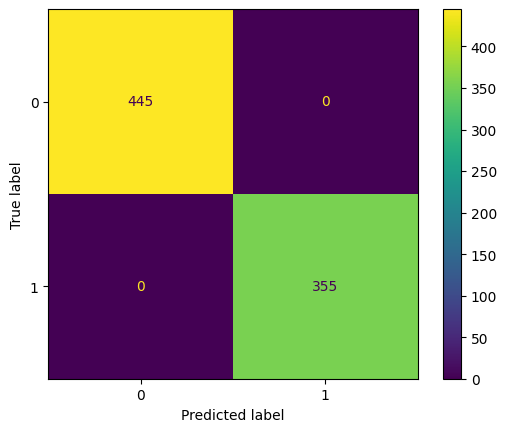

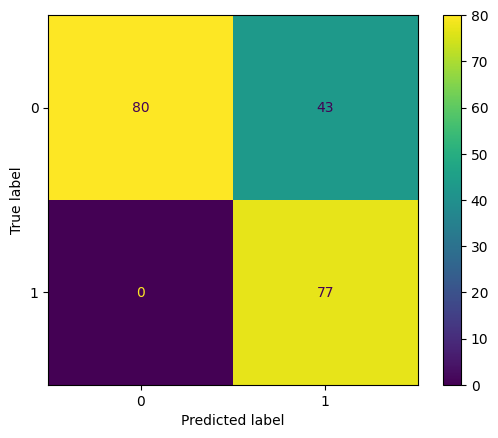

In [4]:
score_package_train_knn = model_predict_evaluate(
        model=model_knn, 
        name_model='knn', 
        name_dataset='train',
        news_loader=train_news_loader
)

score_package_test_knn = model_predict_evaluate(
        model=model_knn, 
        name_model='knn', 
        name_dataset='test',
        news_loader=test_news_loader
)

model_directory[ModelEnum.knn] = model_knn
train_score_packages[ModelEnum.knn] = score_package_train_knn
test_score_packages[ModelEnum.knn] = score_package_test_knn

# Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

model_logisticRegression = LogisticRegression(solver='liblinear', random_state=0)
model_logisticRegression.fit(
    train_news_loader.predictors, train_news_loader.target)

LogisticRegression(random_state=0, solver='liblinear')

For <logisticRegression> evaluated on <train> Dataset:
    - accuracy: 1.0
    - precisionn: 1.0
    - recall: 1.0
    - f1 score: 1.0
For <logisticRegression> evaluated on <test> Dataset:
    - accuracy: 0.92
    - precisionn: 0.961
    - recall: 0.851
    - f1 score: 0.917


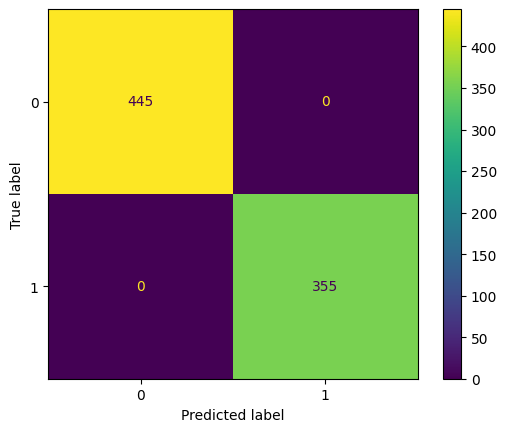

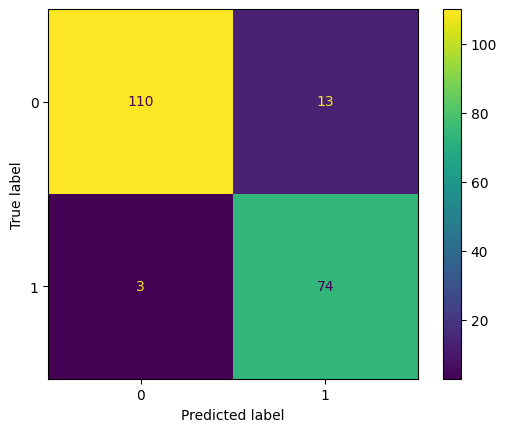

In [6]:
score_package_train_logisticRegression = model_predict_evaluate(
        model=model_logisticRegression, 
        name_model='logisticRegression', 
        name_dataset='train',
        news_loader=train_news_loader
)

score_package_test_logisticRegression = model_predict_evaluate(
        model=model_logisticRegression, 
        name_model='logisticRegression', 
        name_dataset='test',
        news_loader=test_news_loader
)

model_directory[ModelEnum.logisticRegression] = model_logisticRegression
train_score_packages[ModelEnum.logisticRegression] = score_package_train_logisticRegression
test_score_packages[ModelEnum.logisticRegression] = score_package_test_logisticRegression

# Linear SVM

In [7]:
from sklearn import svm

model_svc = svm.SVC(C=0.1, kernel = "linear").fit(train_news_predictors, train_news_target).fit(
    train_news_loader.predictors, train_news_loader.target)

For <linearSVM> evaluated on <train> Dataset:
    - accuracy: 0.968
    - precisionn: 1.0
    - recall: 0.932
    - f1 score: 0.967
For <linearSVM> evaluated on <test> Dataset:
    - accuracy: 0.925
    - precisionn: 0.974
    - recall: 0.852
    - f1 score: 0.923


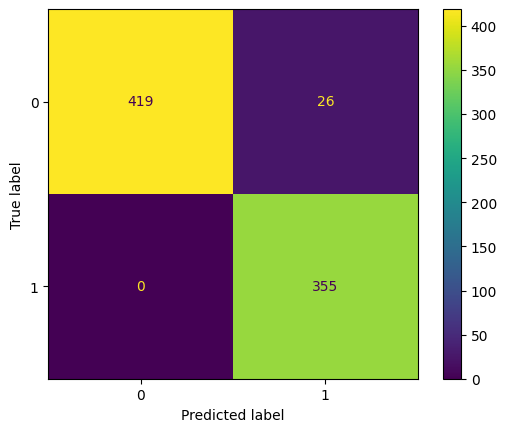

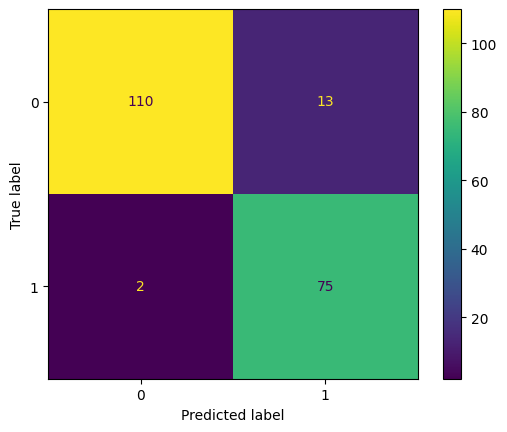

In [8]:
score_package_train_linearSVN = model_predict_evaluate(
        model=model_svc, 
        name_model='linearSVM', 
        name_dataset='train',
        news_loader=train_news_loader
)

score_package_test_linearSVN = model_predict_evaluate(
        model=model_svc, 
        name_model='linearSVM', 
        name_dataset='test',
        news_loader=test_news_loader
)

model_directory[ModelEnum.linearSVM] = model_svc
train_score_packages[ModelEnum.linearSVM] = score_package_train_linearSVN
test_score_packages[ModelEnum.linearSVM] = score_package_test_linearSVN

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier
model_randomForest = RandomForestClassifier(max_depth=30, min_samples_split=5, 
                                   max_features=20000, n_estimators=100, oob_score=True)

model_randomForest.fit(train_news_loader.predictors, 
                       train_news_loader.target)

RandomForestClassifier(max_depth=30, max_features=20000, min_samples_split=5,
                       oob_score=True)

For <randomForest> evaluated on <train> Dataset:
    - accuracy: 0.979
    - precisionn: 1.0
    - recall: 0.954
    - f1 score: 0.979
For <randomForest> evaluated on <test> Dataset:
    - accuracy: 0.93
    - precisionn: 0.987
    - recall: 0.854
    - f1 score: 0.928


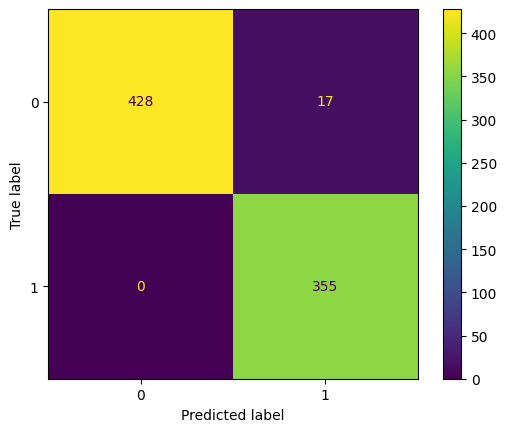

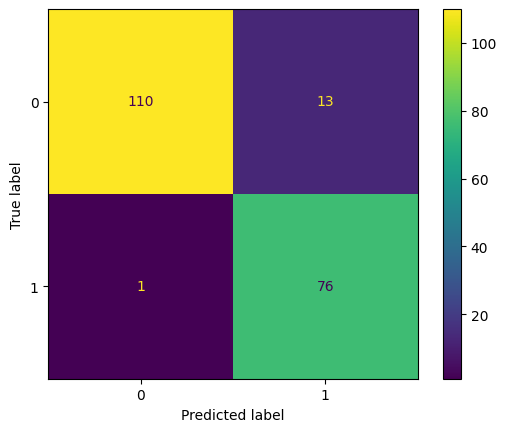

In [10]:
score_package_train_randomForest = model_predict_evaluate(
        model=model_randomForest, 
        name_model='randomForest', 
        name_dataset='train',
        news_loader=train_news_loader
)

score_package_test_randomForest = model_predict_evaluate(
        model=model_randomForest, 
        name_model='randomForest', 
        name_dataset='test',
        news_loader=test_news_loader
)

model_directory[ModelEnum.randomForest] = model_randomForest
train_score_packages[ModelEnum.randomForest] = score_package_train_randomForest
test_score_packages[ModelEnum.randomForest] = score_package_test_randomForest

# Voting Classifier 

In [11]:
from sklearn.ensemble import VotingClassifier

base_estimators = [('logreg', LogisticRegression(solver='liblinear', 
                                                 random_state=0)),
                   ('randomForest', RandomForestClassifier(max_depth=20, 
                                                      min_samples_split=5, 
                                                      max_features=20000, 
                                                      n_estimators=100, 
                                                      oob_score=True)),
                   ('svm', svm.SVC(C=0.1, kernel = "linear"))]

model_voting = VotingClassifier(estimators=base_estimators)
model_voting.fit(train_news_loader.predictors, 
                 train_news_loader.target)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(random_state=0,
                                                 solver='liblinear')),
                             ('randomForest',
                              RandomForestClassifier(max_depth=20,
                                                     max_features=20000,
                                                     min_samples_split=5,
                                                     oob_score=True)),
                             ('svm', SVC(C=0.1, kernel='linear'))])

For <voting> evaluated on <train> Dataset:
    - accuracy: 0.972
    - precisionn: 1.0
    - recall: 0.942
    - f1 score: 0.972
For <voting> evaluated on <test> Dataset:
    - accuracy: 0.925
    - precisionn: 0.974
    - recall: 0.852
    - f1 score: 0.923


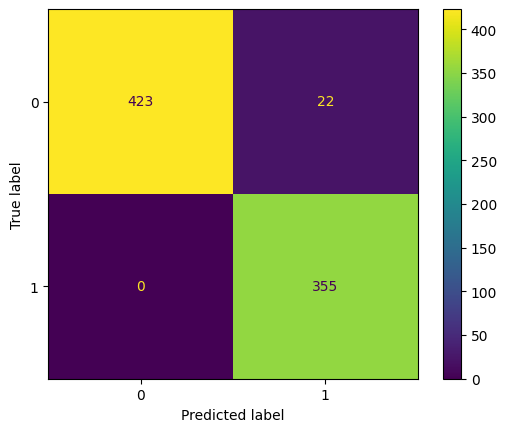

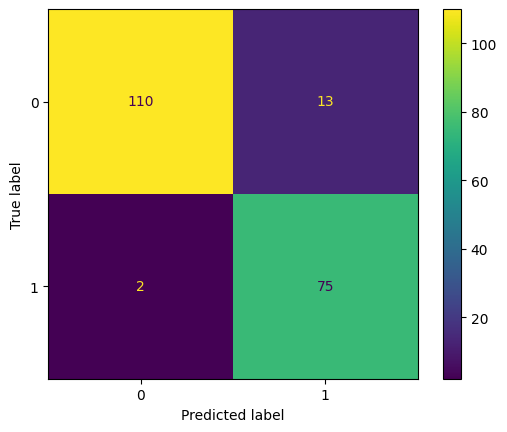

In [12]:
score_package_train_voting = model_predict_evaluate(
        model=model_voting, 
        name_model='voting', 
        name_dataset='train',
        news_loader=train_news_loader
)

score_package_test_voting = model_predict_evaluate(
        model=model_voting, 
        name_model='voting', 
        name_dataset='test',
        news_loader=test_news_loader
)


model_directory[ModelEnum.voting] = model_voting
train_score_packages[ModelEnum.voting] = score_package_train_voting
test_score_packages[ModelEnum.voting] = score_package_test_voting

# Stacked Generalization

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Create list of models in the ensemble
base_models = [('logreg', LogisticRegression(solver='liblinear')),
              ('tree', DecisionTreeClassifier(max_depth=8))]

## Final model used to aggregate predicted probs
my_final_estimator = DecisionTreeClassifier(max_depth=2)

## Create stack
from sklearn.ensemble import StackingClassifier
model_stack = StackingClassifier(estimators = base_models, final_estimator = my_final_estimator, 
                              stack_method ='predict_proba', cv=5)

## Fit and Evaluate (cv is done internally in StackingClassifier)
fitted_stack = model_stack.fit(train_news_loader.predictors, 
                               train_news_loader.target)

For <stack> evaluated on <train> Dataset:
    - accuracy: 1.0
    - precisionn: 1.0
    - recall: 1.0
    - f1 score: 1.0
For <stack> evaluated on <test> Dataset:
    - accuracy: 0.92
    - precisionn: 0.961
    - recall: 0.851
    - f1 score: 0.917


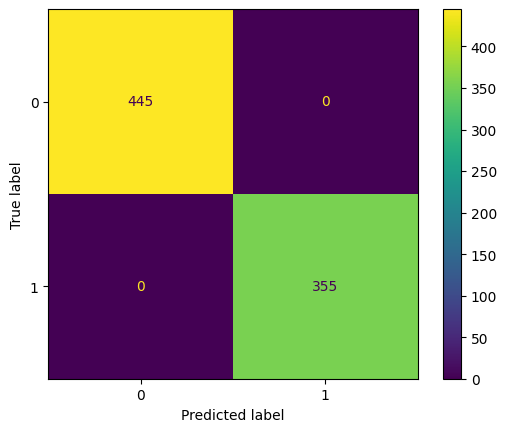

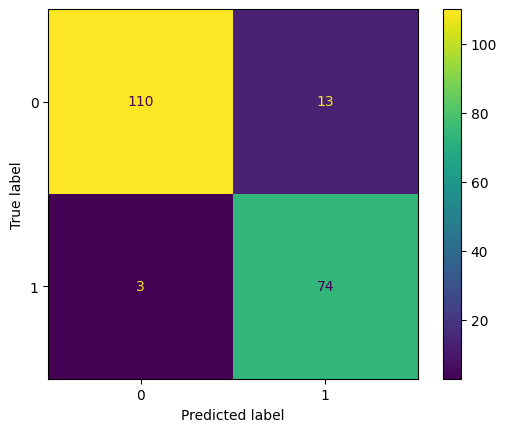

In [14]:
score_package_train_stack = model_predict_evaluate(
        model=model_stack, 
        name_model='stack', 
        name_dataset='train',
        news_loader=train_news_loader
)

score_package_test_stack = model_predict_evaluate(
        model=model_stack, 
        name_model='stack', 
        name_dataset='test',
        news_loader=test_news_loader
)

model_directory[ModelEnum.stack] = model_stack
train_score_packages[ModelEnum.stack] = score_package_train_stack
test_score_packages[ModelEnum.stack] = score_package_test_stack

# AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier


model_adaBoost = AdaBoostClassifier(n_estimators=100, 
                                    learning_rate=0.1, 
                                    algorithm = 'SAMME')

model_adaBoost.fit(train_news_loader.predictors, 
                   train_news_loader.target)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=100)

For <adaBoost> evaluated on <train> Dataset:
    - accuracy: 0.895
    - precisionn: 1.0
    - recall: 0.809
    - f1 score: 0.895
For <adaBoost> evaluated on <test> Dataset:
    - accuracy: 0.93
    - precisionn: 1.0
    - recall: 0.846
    - f1 score: 0.928


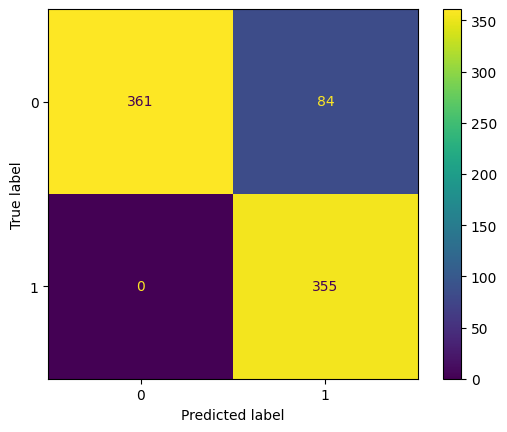

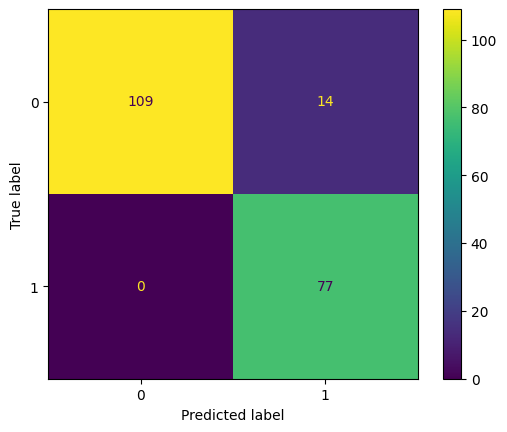

In [16]:
score_package_train_adaBoost = model_predict_evaluate(
        model=model_adaBoost, 
        name_model='adaBoost', 
        name_dataset='train',
        news_loader=train_news_loader
)

score_package_test_adaBoost = model_predict_evaluate(
        model=model_adaBoost, 
        name_model='adaBoost', 
        name_dataset='test',
        news_loader=test_news_loader
)

model_directory[ModelEnum.adaBoost] = model_adaBoost
train_score_packages[ModelEnum.adaBoost] = score_package_train_adaBoost
test_score_packages[ModelEnum.adaBoost] = score_package_test_adaBoost

# RNN

In [18]:
import torch

In [25]:
words = [sentence.split(' ') for sentence in train_news_loader_rnn.predictors.to_numpy()] + \
             [sentence.split(' ') for sentence in test_news_loader_rnn.predictors.to_numpy()]
words = np.array([word for sentence in words for word in sentence])
# hashing words for constant time searching
all_words_word2index = {word : index for index, word in enumerate(np.unique(words))}
n_words = len(all_words_word2index)

In [26]:
# Function to iterate through a sentence of text encode each 
#   letter as a 1 x n_words vector in an #words x 1 x n_words tensor
def sentence2tensor(sentence, all_words_word2index):
    sentence_parsed = sentence.split(' ')
    tensor = torch.zeros(len(sentence_parsed), 1, n_words)
    for index_word, word in enumerate(sentence_parsed):
        tensor[index_word][0][all_words_word2index[word]] = 1
    return tensor

In [27]:
from torch import nn
class news_cnn(nn.Module):
    ## Constructor commands
    def __init__(self, input_size, hidden_size, output_size):
        super(news_cnn, self).__init__()

        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    ## Function to generate predictions
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(hidden)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
    
## Function to randomly sample a single example
import random
def randomTrainingExample():
    ## Randomly choose a category index (1 and 0)
    category = random.randint(0, 1)
    
    ## Randomly choose a name in that category
    sentence = train_news_predictors_rnn[train_news_target == category].sample(
                                        n=1).to_numpy()[0]
    ## Convert the chosen example to a tensor
    category_tensor = torch.tensor([category], dtype=torch.long)
    sentence_tensor = sentence2tensor(sentence)
    
    return category, sentence, category_tensor, sentence_tensor

In [28]:
## Set learning rate
learning_rate = 0.005

## Define cost func
cost_fn = nn.CrossEntropyLoss()

## Training function for a single input (name category, name)
def train(model, category_tensor, sentence_tensor):
    
    ## initialize the hidden state
    hidden = model.initHidden()
    
    ## set the gradient to zero
    model.zero_grad()

    ## loop through the letters in the input, getting a prediction and new hidden state each time
    for i in range(sentence_tensor.size()[0]):
        output, hidden = model(sentence_tensor[i], hidden)

    ## Calculate cost and gradients
    cost = cost_fn(output, category_tensor)
    cost.backward()

    # Update parameters
    for p in model.parameters():
        p.data.add_(p.grad.data, alpha = -learning_rate) ## This adds the LR times the gradient to each parameter 

    ## Return the output and cost
    return output, cost.item()

In [29]:
## Initializations
n_iters = 2000
cost_every_n = 25
current_cost = 0
track_cost = []

news_rnn_inst = news_cnn(n_words, 6000, 2)

### Iteratively update model from randomly chosen example
for iter in range(1, n_iters + 1):
    if (iter % 5 == 0):
        print(f'{iter} iterations completed!')
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, cost = train(news_rnn_inst, category_tensor, line_tensor)
    current_cost += cost
    
    # Save cost every 25 iterations
    if iter % cost_every_n == 0:
        track_cost.append(current_cost/cost_every_n)
        current_cost = 0

20 iterations completed!
40 iterations completed!
60 iterations completed!
80 iterations completed!
100 iterations completed!
120 iterations completed!
140 iterations completed!
160 iterations completed!
180 iterations completed!
200 iterations completed!
220 iterations completed!
240 iterations completed!
260 iterations completed!
280 iterations completed!
300 iterations completed!
320 iterations completed!
340 iterations completed!
360 iterations completed!
380 iterations completed!
400 iterations completed!
420 iterations completed!
440 iterations completed!
460 iterations completed!
480 iterations completed!
500 iterations completed!


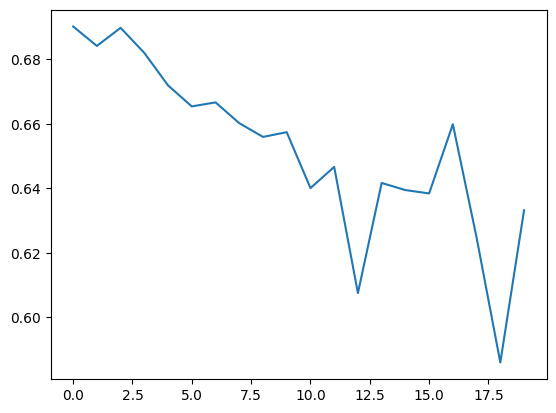

In [30]:
plt.plot(track_cost)
plt.show()

In [31]:
def predict(model, train_news_loader_rnn):    
    ## Don't update gradient with any of these examples
    def __predict(model, sentence):
        with torch.no_grad():
            ## Initialize new hidden state
            hidden = model.initHidden()
            
            ## Convert input str to tensor
            input_t = sentence2tensor(sentence, all_words_word2index)
            ## Pass each character into `rnn`
            for i in range(input_t.size()[0]):
                output, hidden = model(input_t[i], hidden)

            # Get top N categories from output
            _, topi = output.topk(1, 1, True)
            return topi[0][0].item()
    return [__predict(news_rnn_inst, sentence) 
            for sentence in train_news_loader_rnn.predictors]

In [32]:
# train_news_predictors, train_news_target
 
train_news_target_predicted_rnn = predict(news_rnn_inst, train_news_loader_rnn) 
test_news_target_predicted_rnn = predict(news_rnn_inst, test_news_loader_rnn) 

In [33]:
name_model = 'rnn'
train_evaluation_loader_rnn = EvaluationDataLoader(
        name_dataset='train',
        name_model=name_model,
        target_predicted=train_news_target_predicted_rnn,
        target_actual=train_news_target)
test_evaluation_loader_rnn = EvaluationDataLoader(
    name_dataset='test',
    name_model=name_model,
    target_predicted=test_news_target_predicted_rnn,
    target_actual=test_news_target)

For <rnn> evaluated on <train> Dataset:
    - accuracy: 0.776
    - precisionn: 0.997
    - recall: 0.651
    - f1 score: 0.776
For <rnn> evaluated on <test> Dataset:
    - accuracy: 0.775
    - precisionn: 1.0
    - recall: 0.656
    - f1 score: 0.773


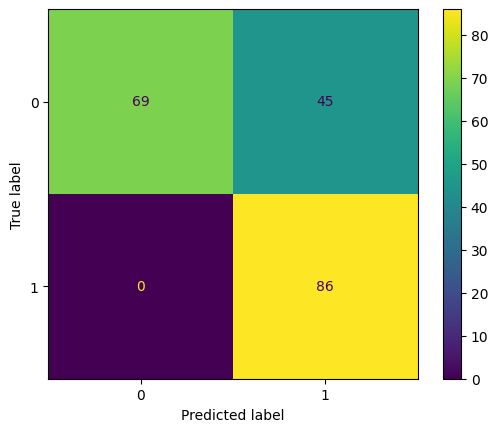

In [34]:
score_package_train_rnn, score_package_test_rnn = model_evaluate(
    train_evaluation_loader_rnn, 
    test_evaluation_loader_rnn)

model_directory[ModelEnum.rnn] = news_rnn_inst
train_score_packages[ModelEnum.rnn] = score_package_train_rnn
test_score_packages[ModelEnum.rnn] = score_package_test_rnn

In [17]:
model_directory

{'knn': KNeighborsClassifier(n_neighbors=200, p=1, weights='distance'),
 'logisticRegression': LogisticRegression(random_state=0, solver='liblinear'),
 'linearSVM': SVC(C=0.1, kernel='linear'),
 'randomForest': RandomForestClassifier(max_depth=30, max_features=20000, min_samples_split=5,
                        oob_score=True),
 'voting': VotingClassifier(estimators=[('logreg',
                               LogisticRegression(random_state=0,
                                                  solver='liblinear')),
                              ('randomForest',
                               RandomForestClassifier(max_depth=20,
                                                      max_features=20000,
                                                      min_samples_split=5,
                                                      oob_score=True)),
                              ('svm', SVC(C=0.1, kernel='linear'))]),
 'stack': StackingClassifier(cv=5,
                    estimators=[('logreg

In [17]:
for model_name, model in model_directory.items():
    for dataset_name, test_tuple in test_loaders_directory.items():
        test_df_loader, test_df_loader_rnn = test_tuple
        score_package_test_model = model_predict_evaluate(
            model=model, 
            name_model=model_name, 
            name_dataset=dataset_name,
            news_loader=test_df_loader,
            display_confusion=False
        )
        score_packages_test_directory[model_name].append(score_package_test_model)
        

For <knn> evaluated on <test2> Dataset:
    - accuracy: 0.795
    - precisionn: 0.993
    - recall: 0.671
    - f1 score: 0.795
For <knn> evaluated on <test3> Dataset:
    - accuracy: 0.762
    - precisionn: 0.995
    - recall: 0.64
    - f1 score: 0.761
For <knn> evaluated on <test4> Dataset:
    - accuracy: 0.768
    - precisionn: 0.995
    - recall: 0.651
    - f1 score: 0.766
For <knn> evaluated on <test5> Dataset:
    - accuracy: 0.771
    - precisionn: 1.0
    - recall: 0.647
    - f1 score: 0.77
For <logisticRegression> evaluated on <test2> Dataset:
    - accuracy: 0.907
    - precisionn: 0.952
    - recall: 0.844
    - f1 score: 0.906
For <logisticRegression> evaluated on <test3> Dataset:
    - accuracy: 0.898
    - precisionn: 0.969
    - recall: 0.821
    - f1 score: 0.897
For <logisticRegression> evaluated on <test4> Dataset:
    - accuracy: 0.908
    - precisionn: 0.981
    - recall: 0.834
    - f1 score: 0.908
For <logisticRegression> evaluated on <test5> Dataset:
    - ac

In [18]:
[package.accuracy for package in score_packages_test_directory[ModelEnum.adaBoost]]

[0.914, 0.891, 0.898, 0.888]